In [ ]:
# This program using a Artificial Recurrent Neural Network called LSTM (Long Short Term Memory) 
# to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [2]:
#Imports
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Get the stock quote
df = web.DataReader('AAPL', data_source = 'yahoo', start='2012-01-01', end='2020-12-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.737653
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.879066
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013701
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.993060
...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.970001
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.690002
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.869995


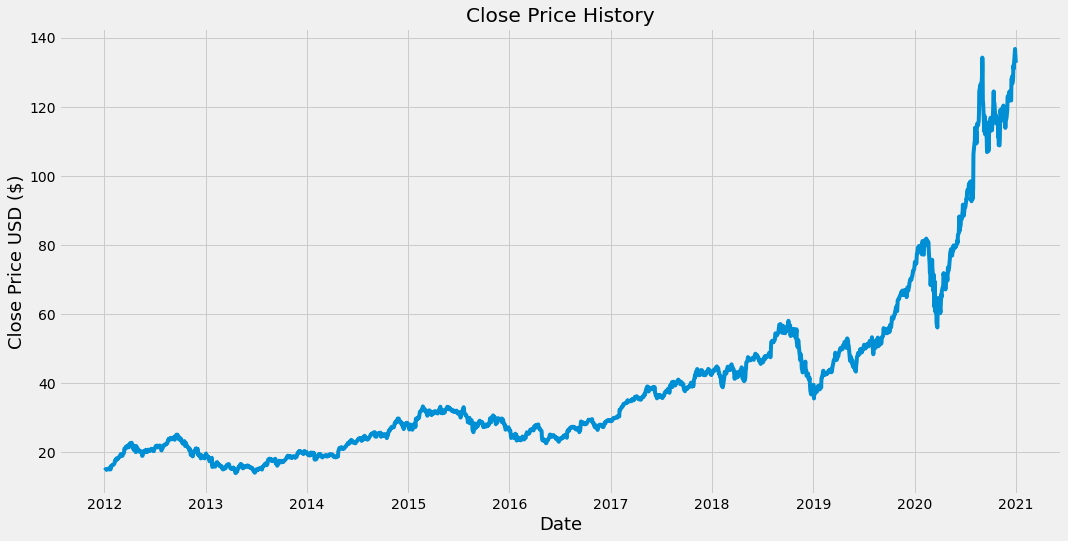

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize = 18)
plt.show()

In [5]:
#Create a new data frame with only the 'Close column
data = df.filter(['Close'])
#Convert data frame to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)

training_data_len 

1812

In [6]:
#Scale the data so we can apply preprocessing transformation scaling or normalizations before it is presented to a neural network
scaler = MinMaxScaler(feature_range=(0,1))
#transform our data, computes the min and max values valuecould be 0, could be 1
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00602306],
       [0.0066661 ],
       [0.00800165],
       ...,
       [0.98517215],
       [0.97580299],
       [0.96741145]])

In [7]:
#Create the training data set, Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
#x_train independetly training variables/ features
#y_train is the depedent training variables
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()


[array([0.00602306, 0.0066661 , 0.00800165, 0.00927319, 0.00907824,
       0.0095176 , 0.00931683, 0.0089793 , 0.00851957, 0.00994242,
       0.01122559, 0.01082987, 0.00866214, 0.01073094, 0.00869416,
       0.0163321 , 0.01574144, 0.0165125 , 0.01817975, 0.01918941,
       0.01910503, 0.0187937 , 0.02012052, 0.02136877, 0.02278289,
       0.025067  , 0.02986508, 0.02993782, 0.03260892, 0.03460496,
       0.03117444, 0.03249544, 0.03246925, 0.03617329, 0.03564663,
       0.03662137, 0.03837301, 0.03934777, 0.04215562, 0.04420112,
       0.04479179, 0.04499838, 0.04150094, 0.04065712, 0.04078224,
       0.0440702 , 0.04499548, 0.0469828 , 0.0516674 , 0.05791742,
       0.05674772, 0.05675062, 0.06126938, 0.0626835 , 0.06167673,
       0.06075728, 0.05979999, 0.06298027, 0.06516255, 0.06607619])]
[0.06381826722571945]



In [8]:
#Above the first array is the x_train and the bottom is the y_train data set. The y_train data set contains the 
#61st value that we want our model to predict x_train dataset contains past 60 values


In [9]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the x_train data set
#LSTM expects input to be three dimensional in the form of number of examples, 
x_train = np.reshape(x_train , (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1752, 60, 1)

In [13]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
#compile the model 
model.compile(optimizer='adam', loss= 'mean_squared_error')

In [16]:
#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1752/1752 [==============================] - 24s 13ms/step - loss: 3.8865e-04


In [17]:
#Create the testing data set
#Create new array containing scaled values from index 1752 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60: i, 0])
    



In [18]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [19]:
#reshape the data because our dataset is 2d and we want it 3d because the LSTM is expecting a 3d shape
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))

In [20]:
#get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [21]:
#evaluate the model by getting the root mean squred error (RSME) good measure of how the accurate measures the response
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.25238495209885486

C:\Anaconda3\envs\stockprediction\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


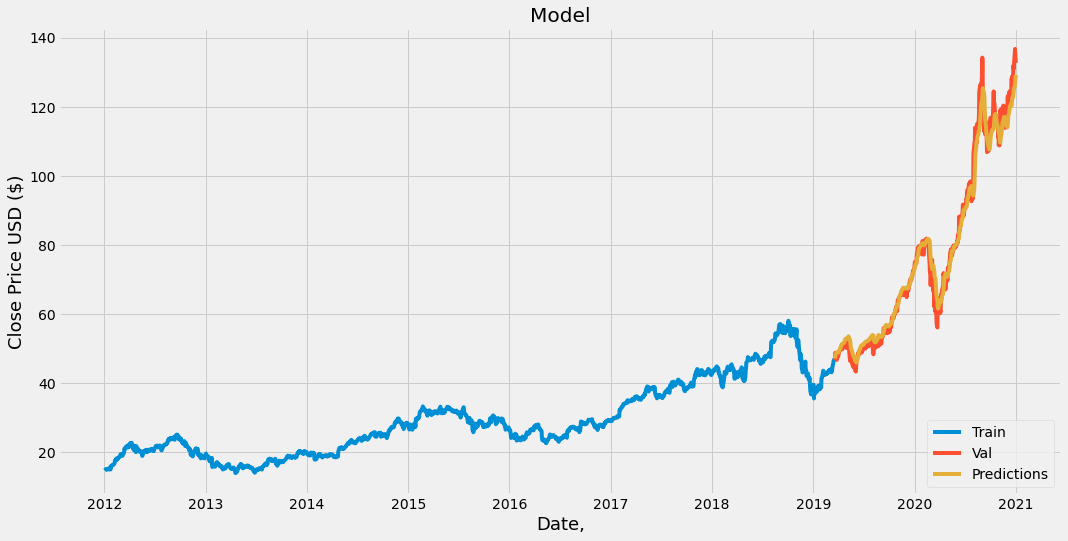

In [24]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the model
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date,',fontsize = 18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()


In [25]:
#show the valid and predicted prices
valid 

,Close,Predictions
Date,,
2019-03-19,46.632500,47.092068
2019-03-20,47.040001,47.479355
2019-03-21,48.772499,47.822144
2019-03-22,47.762501,48.318535
2019-03-25,47.185001,48.699738
...,...,...
2020-12-24,131.970001,125.300041
2020-12-28,136.690002,126.115982
2020-12-29,134.869995,127.423485


In [27]:
#Get the quote
apple_quote = web.DataReader('AAPL',data_source = 'yahoo', start = '2012-01-01', end ='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled  = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days t
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#reshape the data
X_test = np.reshape(X_test , (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[69.9009]]


In [29]:
apple_quote2 = web.DataReader('AAPL',data_source = 'yahoo', start = '2019-12-18', end ='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
